In [18]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import copy
import scipy.special as scp
from PIL import Image

# MATH 387 LAB 3 
David Knapik (260607757) 

4/11/18

# Exercise 1

In [19]:
def Createcheb(n): #takes a positive integer n; creates Chebychev nodes in (-1,1)
    x = list();
    
    for i in range(1,n+1):
        x.append(np.cos((2*i-1)/(2*n)*np.pi)) #Formula for Chebychev nodes
        
    return np.array(x)

In [22]:
def Abs_Lagrange_Coeff(Nodes,k,x): #Compute the absolute value of the k-th Lagrange coefficient (basis function/polynomial) 
    prod = 1 #initialize the product we are computing
    x_k = Nodes[k]
    
    for x_i in Nodes:
        if x_i != x_k:
            prod = prod * (x-x_i)/(x_k-x_i) #Formula for the basis polynomial
               
    return np.abs(prod) 

In [28]:
def MaxLambda(n):#This corresponds to the desired Lebesgue constant ||Ln||
    Mlbda = 0
    N = Createcheb(n)
    
    for i in range(n):
        Mlbda = Mlbda + Abs_Lagrange_Coeff(N,i,-1) #evaluate at -1 since the max is attained at +-1 (both give same value)
        
    return Mlbda

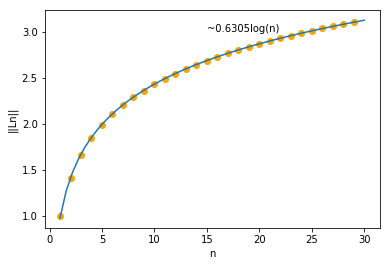

In [29]:
nmin = 1
nmax = 30
X = np.array(range(nmin,nmax))
Y = []

for j in X:
    Y.append(MaxLambda(j)) #y-axis is the ||Ln||
    
plt.scatter(X,Y,color="orange")
plt.xlabel("n")
plt.ylabel("||Ln||")

dependence = np.polyfit(np.log(X),Y,deg=1)     #Line of best fit
dx = np.linspace(nmin,nmax,50)
dy = dependence[1]+np.log(dx)*dependence[0]
plt.plot(dx,dy)
plt.text(15,3,"~"+str(round(dependence[0],4))+"log(n)")
plt.show()

From the plot of $||L_n||$ against $n$, we experimentally determine the constant $C$ in the assumed dependence $||L_n||=C \log n$ to be:

$$C \approx 0.6305$$



# Exercise 2

In [61]:
def Createequal(n): #positive integer n; creates equidistant nodes in (-1,1)
    x = np.linspace(-1,1,n)
    
    return np.array(x)

In [62]:
def Derivative_Lagrange_Coeff(Nodes,k,x):
    Numerator = 0 #Initialize the Numerator
    a = []
    l = len(Nodes)
    
    for j in range(l):
        if j!=k:
            a.append(Nodes[j])
            
    for p in a:  #Calculate the numerator of the derivative of the Lagrange Coefficients
        prod = 1
        for q in a:
            prod = prod * (x-q)
        prod = prod / (x-p)
        Numerator = prod + Numerator
    
    Denominator = 1 #Initialize the Denominator
    
    for i in range(l):    #Calculate the denominator of the derivative of the Lagrange Coefficients
        if i != k:
            Denominator = Denominator * (Nodes[k]-Nodes[i])
            
            
    return Numerator/Denominator

In [63]:
def Lambda(Nodes,x): #Computes lambda_n(x)
    l = len(Nodes)
    lbda = 0 
    
    for j in range(l):
        lbda = lbda + Abs_Lagrange_Coeff(Nodes,j,x)
        
    return lbda

In [30]:
def Lagrange_Coeff(Nodes,k,x): #Compute the k-th Lagrange coefficient (basis function/polynomial) 
    prod = 1 #initialize the product
    x_k = Nodes[k]
    
    for x_i in Nodes:
        if x_i != x_k:
            prod = prod * (x-x_i)/(x_k-x_i) #Formula for the basis polynomial
               
    return prod

In [31]:
def Derivative_Lambda(Nodes,x): #Computes lambda'
    l = len(Nodes)
    Dlbda = 0
    
    for j in range(l):
        Dlbda = Dlbda + np.sign(Lagrange_Coeff(Nodes,j,x))*Derivative_Lagrange_Coeff(Nodes,j,x)
        
    return Dlbda

In [33]:
def SecantMethod(x_0,Nodes,epsilon): #Secant method-->a root finding algorithm (finite difference approx. of Newton's Method)
    #x_0 is the initial guess
    #epsilon>0 will be taken to be very small
    
    while np.abs(Derivative_Lambda(Nodes,x_0)) > epsilon:
        x_0 = x_0 - (Derivative_Lambda(Nodes,x_0))/((Derivative_Lambda(Nodes,x_0+epsilon)-Derivative_Lambda(Nodes,x_0-epsilon))/(2*epsilon))
        
        
    return x_0

In [35]:
def LebesgueConstant_Equal(n): #Computes ||Ln||
    Nodes = Createequal(n) #equidistant nodes
    ig = (1/2)*Nodes[0]+(1/2)*Nodes[1] #we take this as our initial guess x_0
    globmax = SecantMethod(ig,Nodes,0.0001) #use Secant Method to find the desired zero
    
    return Lambda(Nodes,globmax)

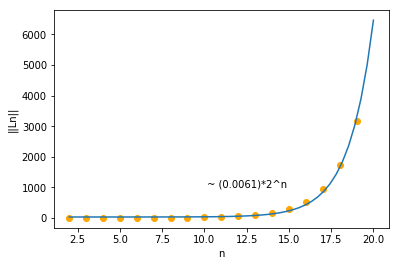

In [86]:
nmin = 2
nmax = 20
X = np.array(range(nmin,nmax))
Y = []

for j in X:
    Y.append(LebesgueConstant_Equal(j))
    
plt.scatter(X,Y,color="orange")
plt.xlabel("n")
plt.ylabel("||Ln||")

dependence = np.polyfit(2**X,Y,deg=1)     
dx = np.linspace(nmin,nmax,50)
dy = dependence[1]+(2**dx)*dependence[0]
plt.plot(dx,dy)
plt.text(10,1000," ~ ("+str(round(dependence[0], 4))+")*2^n")
plt.show()

From the above plot of $||L_n||$ against $n$, we see that $||L_n|| \approx 2^n$.

# Exercise 3

In [38]:
def Quadnodes(n):
    j=1
    Nodes = [0.0000000001] #First node is very close to 0
    node = (np.pi)/((n+1/2)*4) #The zeros of the integrand are at at multiples of pi/(n+1/2) , so put 4 for each division
    
    while node < np.pi:
        Nodes.append(node)
        j=j+1
        node = (j*np.pi)/((n+1/2)*4) #update node
    Nodes.append(np.pi) #Last node is pi
    return Nodes

In [40]:
def Integrand(n,theta): #Computes the integrand in (**) of the lab theory
    return np.abs((np.sin((n+1/2)*theta))/(2*np.sin(theta/2)))

In [41]:
def LebConstantChebyTrunc(n): #Computes ||Sn||
    LC = 0
    Nodes = Quadnodes(n)
    l = len(Nodes)
    
    #We use the composite trapezoidal rule:
    for j in range(0,l-1):
        a = Integrand(n,Nodes[j])
        b = Integrand(n,Nodes[j+1])
        LC = LC +(Nodes[j+1]-Nodes[j])*((a+b)/2)
        
    return LC

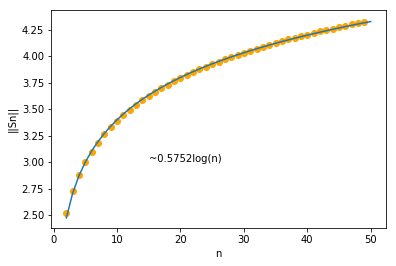

In [42]:
nmin = 2
nmax = 50
X = np.array(range(nmin,nmax))
Y = []

for j in X:
    Y.append(LebConstantChebyTrunc(j))
    
plt.scatter(X,Y,color="orange")
plt.xlabel("n")
plt.ylabel("||Sn||")

dependence = np.polyfit(np.log(X),Y,deg=1)     
dx = np.linspace(nmin,nmax,50)
dy = dependence[1]+np.log(dx)*dependence[0]
plt.plot(dx,dy)
plt.text(15,3,"~"+str(round(dependence[0],4))+"log(n)")
plt.show()

From the plot of $||S_n||$ against $n$, we experimentally determine the constant $C$ in the assumed dependence $||S_n||=C \log n$ to be:

$$C \approx 0.5752$$

# Exercise 4

In [1]:
def a(k):
    return (2*k+1)/(2) #We use the a_k determined in Assignment 4

In [43]:
def P(k,x): #Compute Legendre Polynomials
    prelim = 0
    for i in range(0,k+1):
        prelim = prelim + (x**i)*scp.binom(k,i)*scp.binom((k+i-1)/2,k) #formula (without the 2^k factor)
        
    return (2**k)*prelim

In [44]:
def Integrand2(n,x):#Computes the integrand in (†) of the lab theory
    integrand = 0
    
    for k in range(0,n+1):
        integrand = integrand + a(k)*P(k,x)
        
    return np.abs(integrand)

In [45]:
def LebConstantLegTrunc(n): #Computes ||Sn||
    LC = 0
    Nodes = np.linspace(-1,1,7*n) #use equally spaced nodes
    l = len(Nodes)
    
    #We use the composite trapezoidal rule:
    for j in range(0,l-1):
        a = Integrand2(n,Nodes[j])
        b = Integrand2(n,Nodes[j+1])
        LC = LC +(Nodes[j+1]-Nodes[j])*((a+b)/2)
        
    return LC

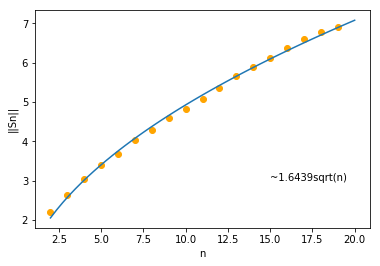

In [11]:
nmin = 2
nmax = 20
X = np.array(range(nmin,nmax))
Y = []

for j in X:
    Y.append(LebConstantLegTrunc(j))
    
plt.scatter(X,Y,color="orange")
plt.xlabel("n")
plt.ylabel("||Sn||")

dependence = np.polyfit(np.sqrt(X),Y,deg=1)     
dx = np.linspace(nmin,nmax,50)
dy = dependence[1]+np.sqrt(dx)*dependence[0]
plt.plot(dx,dy)
plt.text(15,3,"~"+str(round(dependence[0],4))+"sqrt(n)")
plt.show()

From the plot of $||S_n||$ against $n$, we experimentally determine the constant $C$ in the assumed dependence $||S_n||=C \sqrt{ n}$ to be:

$$C \approx 1.6439$$

Perhaps if we had more information about the integrand, we could choose our nodes more carefully and obtain a bit of a better fit.

# Exercise 5

In [10]:
def Weights(Nodes,k): #We approximate the integral of the k-th Lagrange basis polynomial to get the weights
    weight =0
    l = len(Nodes)
    interpnodes = np.linspace(0,1,l*3)
    l2 = len(interpnodes)
    
    #We use the trapezoidal rule:
    for j in range(0,l2-1):
        a = Lagrange_Coeff(Nodes,k,interpnodes[j])
        b = Lagrange_Coeff(Nodes,k,interpnodes[j+1])
        weight = weight + ((interpnodes[j+1]- interpnodes[j])*((a+b)/2))
        
    return weight

In [46]:
def LebConstantNC(n): #Computes ||Qn||
    LC = 0
    Nodes = np.linspace(0,1,n+1)  #n+1 nodes for the interval [0,1] (we use equally spaced nodes)
    l = len(Nodes)
    
    for k in range(0,n+1):
        LC = LC + np.abs(Weights(Nodes,k)) #Using formula (††)
        
    return LC

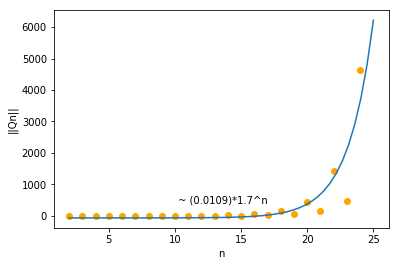

In [50]:
nmin = 2
nmax = 25
X = np.array(range(nmin,nmax))
Y = []

for j in X:
    Y.append(LebConstantNC(j))
    
plt.scatter(X,Y,color="orange")
plt.xlabel("n")
plt.ylabel("||Qn||")

dependence = np.polyfit(1.7**X,Y,deg=1)     
dx = np.linspace(nmin,nmax,50)
dy = dependence[1]+(1.7**dx)*dependence[0]
plt.plot(dx,dy)
plt.text(10,400," ~ ("+str(round(dependence[0], 4))+")*1.7^n")
plt.show()

From the above plot of $||Q_n||$ against $n$, we guess that the functional dependence of $||Q_n||$ on $n$ is exponential.